<a href="https://colab.research.google.com/github/Danjstr/cifar10_CNN/blob/master/Machine_Learning_Technical_Writer_Sample_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: This program classifies images
#Keras is already installed but you may need to pip install keras
#This model is built in Google colab.


In [1]:
#Import nessecary modules
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from keras.datasets import cifar10


Using TensorFlow backend.


In [0]:
#Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
#As we will see below after printing X_tain and X_test have 50,000 thousand and 10,000 rows respectivley, they are 32 by 32 pixel images, with a depth of 3 for all three red, blue and green values.
#y_train and y_test have 50,000 and 10,000 rows respectively, both have a single column.

#Get the shapes
print('x_train shape:', x_train.shape) 
print('y_train shape:', y_train.shape) 
print('x_test shape:', x_test.shape) 
print('y_test shape:', y_test.shape) 

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [4]:

#In the case below the individual lists each represent a pixel. The three varaibles in each list represent the color of the pixel.
# Consider index[0] of X_train[0], [ 59,  62,  63] can be read as [Red=59,Blue=62,Green=63].
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
#Print the label of the image
#0 = airplane 1 = automobile 2 = bird 3 = cat 4 = deer 5 = dog 6 = frog 7 = horse 8 = ship 9 = truck
print('The label is:', y_train[0])

The label is: [6]


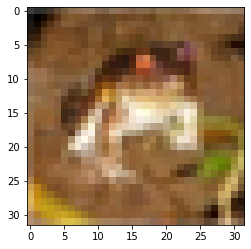

In [6]:
#Show the first image in index[0] 
img = plt.imshow(x_train[0])

In [0]:
#One-Hot Encoding 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
#Print all of the new labels for the training data saved as y_train_one_hot
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
#Print one of the new labels as an example:
print('The frog is not labeled 6 anymore it is one hot encoded as:', y_train_one_hot[0])

The frog is not labeled 6 anymore it is one hot encoded as: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Pixel values normaly range between 0 and 255. Normalize the pixels to limmit the range between 0 and 1 , 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
#Build the Convolutinal Nueral Net.
model = Sequential() 
model.add(Conv2D(32, (5, 5), activation='relu',padding='same', input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (5, 5),padding='same', activation='relu'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(200, activation='relu')) 
model.add(Dense(10, activation='softmax')) 


In [0]:
model.compile(loss='categorical_crossentropy', # loss function used for classes that are greater than 2)
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
#Batch: Total number of images in a single batch
#Epoch:The number of training iterations.

hist = model.fit(x_train, y_train_one_hot, 
           batch_size=250, epochs=10, validation_split=0.3 )

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 216s 6ms/step - loss: 1.7593 - accuracy: 0.3503 - val_loss: 1.4623 - val_accuracy: 0.4672
Epoch 2/10
35000/35000 [==============================] - 215s 6ms/step - loss: 1.3607 - accuracy: 0.5080 - val_loss: 1.1911 - val_accuracy: 0.5745
Epoch 3/10
35000/35000 [==============================] - 215s 6ms/step - loss: 1.1689 - accuracy: 0.5823 - val_loss: 1.1175 - val_accuracy: 0.6066
Epoch 4/10
35000/35000 [==============================] - 215s 6ms/step - loss: 1.0381 - accuracy: 0.6308 - val_loss: 0.9628 - val_accuracy: 0.6623
Epoch 5/10
35000/35000 [==============================] - 219s 6ms/step - loss: 0.9280 - accuracy: 0.6696 - val_loss: 0.9179 - val_accuracy: 0.6784
Epoch 6/10
35000/35000 [==============================] - 216s 6ms/step - loss: 0.8596 - accuracy: 0.6953 - val_loss: 0.9129 - val_accuracy: 0.6794
Epoch 7/10
35000/35000 [==============================] - 215s

In [14]:
#Get the models accuracy
model.evaluate(x_test, y_test_one_hot)[1]


10000/10000 [==============================] - 16s 2ms/step


0.7146999835968018

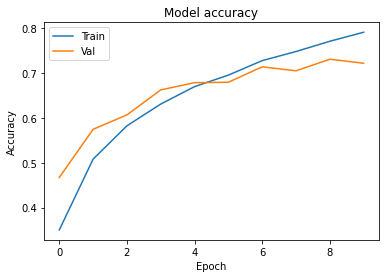

In [15]:
#Visualize accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

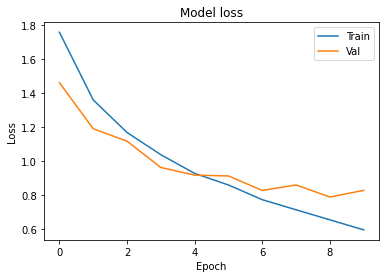

In [16]:
#Visualize loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [18]:
#Load the data
from google.colab import files # Use this to import any image of an animal or vehicle covered by this model to test it.
uploaded = files.upload() # Use to load data on Google Colab
my_image = plt.imread("Horse1.jpeg") 

Saving Horse1.jpeg to Horse1 (3).jpeg


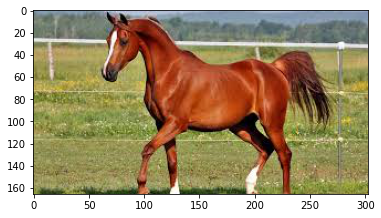

In [19]:
#Show your uploaded image
img = plt.imshow(my_image)

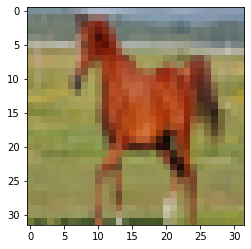

In [20]:
#Resize your image so that it works with the model & Show it again.
my_image_resized = resize(my_image, (32,32,3)) #resize the image to 32x32 pixel with depth = 3
img = plt.imshow(my_image_resized) #show new image

In [21]:
#Show the probability for each class
Confidence=model.predict(np.array([my_image_resized],))
Confidence

array([[1.6524766e-08, 9.3880820e-11, 2.1274489e-06, 1.0052419e-07,
        3.7337337e-05, 3.4857898e-05, 7.9481453e-08, 9.9992549e-01,
        3.2251347e-11, 7.8180840e-09]], dtype=float32)

In [22]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(Confidence[0,:])
print("Models predicted veichle or animal :", number_to_class[index[9]], "-- Confidence:", Confidence[0,index[9]])

Models predicted veichle or animal : horse -- Confidence: 0.9999255
